In [1]:
import pandas as pd
import numpy as np
import random
import math
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import plotly.express as px


# read text file into pandas DataFrame

#data=pd.read_csv("concentric_circles_data", sep=',', header=None, names=["X", "Y" , "priorclass"])
data=pd.read_csv("horshue_data.txt", sep=',', header=None, names=["X", "Y" , "priorclass"])
#data=pd.read_csv("Forty_class.txt", sep=',', header=None, names=["X", "Y" , "priorclass"])


X = np.array(data.iloc[:,0:2])     #Predictor 
y = np.array(data.iloc[:,2])       #Response Values

k = 2
sigma = 1



In Kernel k_means a non-linear function maps the data points to the feature space, where the distance is being calculated and the membership function is being updated.

In [2]:

# array of size X taking values in the range 0 to k
initial_mem = np.random.randint(0,k,len(X)) 
initial_mem

#
initial_centers = np.zeros((k,X.shape[1]))
centers = np.zeros((k,X.shape[1]))
for j in range(k):
  initial_centers[j] = X[initial_mem==j,:].mean(axis=0)




initial_centers

array([[0.51195464, 0.58407629],
       [0.50302557, 0.5873487 ]])

[1 0 0 ... 0 0 0]
[1 1 1 ... 0 0 0] ---------
[[0.51195464 0.58407629]
 [0.50302557 0.5873487 ]]
[[0.67203463 0.45600169]
 [0.50302557 0.5873487 ]]


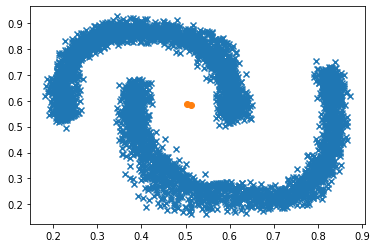

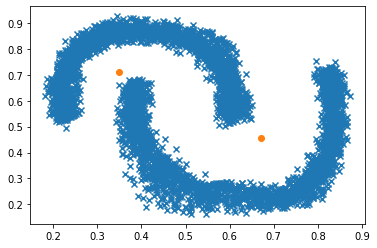

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [5]:
error = 10

member = np.array(initial_mem)
print(member)


'''
ker_ii = np.exp((-1) * cdist(X, X, metric='sqeuclidean')/(2 * sigma))

ker_ih = np.exp((-1) * cdist(X, centers, metric='sqeuclidean')/(2 * sigma))

#ker_ii = np.exp((-1) * cdist(X, X, metric='sqeuclidean')/(2 * sigma),)

for i in range(len(X)):
  for j in range(len(X)):
    if member[i] == member[j]:
      ker_ij = cdist(X[i], , metric='sqeuclidean')


ker_rs = 
'''


kernel = np.zeros((len(X),len(X)))
#array indicating x_i belonging to jth class
gamma = np.zeros((k,len(X)))
dist = np.zeros((k,len(X)))









#kernel = np.exp((-1) * cdist(X, X, metric='sqeuclidean')/(2 * sigma))
kernel = np.exp((-1) * pow(cdist(X, X, metric='euclidean'),2)/(2 * pow(sigma,2)))
#kernel = cdist(X, X, metric='euclidean')
ct=0

centers = np.array(initial_centers)

while( error > 1e-1):


  prev_centers = np.array(centers)
  #k*n membership matrix is created,k--number of clusters and n--number of elements to be clustered
  gamma = np.zeros((k,len(X)))
  
  for i in range(len(X)):
    gamma[member[i]][i] = 1

  prev_dist = np.array(dist)
  

  #Fot the third term
  cluster = np.zeros(k)
  for i in range(k):
    sum = 0
    for j in range(len(X)):
      for l in range(len(X)):
        if gamma[i][j] == 1 and gamma[i][l] == 1:
           sum = sum + kernel[j][l]

    cluster[i] = sum




  #distance of x_i from the centroid of the jth cluster
  for i in range(len(X)):
    for j in range(k):
      c_j = len(gamma[j][gamma[j] == 1])
      #print(c_j,"cluster j")
      if c_j != 0:
        dist[j][i] = kernel[i][i] - 2*kernel[i][np.where(gamma[j] == 1)].sum()/c_j + cluster[j]/(c_j*c_j)

  #membership is calculated based on the distance matrix
  member = dist.argmin(axis=0)
  
  
  
  #for i in range(len(X)):
  #  gamma[member[i]][i] = 1

  print(member,"---------")


  #error = np.linalg.norm(dist-prev_dist)
  ct+=1

  for j in range(k):
    print(centers)
    if len(X[member==j,:]) !=0 :
      centers[j] = X[member==j,:].mean(axis=0)

  error = np.linalg.norm(prev_centers-centers)
  

  plt.scatter(X[:,0], X[:,1], marker='x')
  plt.scatter(initial_centers[:,0], initial_centers[:,1], marker='o')
  plt.show()


  plt.scatter(X[:,0], X[:,1], marker='x')
  plt.scatter(centers[:,0], centers[:,1], marker='o')
  plt.show()


  fig = px.scatter(data, x="X", y="Y", color="priorclass")
  fig.show()

  data1 = data
  data1["pred_class"] = pd.DataFrame(member)
  fig1 = px.scatter(data1, x="X", y="Y", color="pred_class")
  fig1.show()






kernel[0][np.where(gamma[0] == 1)].sum()
#len(gamma[0][gamma[0] == 1])
#gamma[0][gamma[0] == 1]
#ker_ii - ker_ih
#kernel.shape
dist.shape
#gamma = dist.argmin(axis=0)


In [ ]:
'''
from scipy.spatial.distance import cdist

centers = X[indices]
initial_centers = np.array(centers)
centers
error = 10
iteration = 0
while(error > 1e-6):
   
  #Finding the pairwise distance between the data instance and cluster centroids
  dist = cdist(X, centers, metric='sqeuclidean')
  print(dist)
  mem = dist.argmin(axis=1)
  #print(mem)
 

  #Update cluster centroids
  prev_centers = np.array(centers)
  for j in range(k):
    centers[j] = X[mem==j,:].mean(axis=0)
  #print(prev_centers)
  #print(centers)
  error = np.linalg.norm(centers-prev_centers)

  iteration += 1

'''
